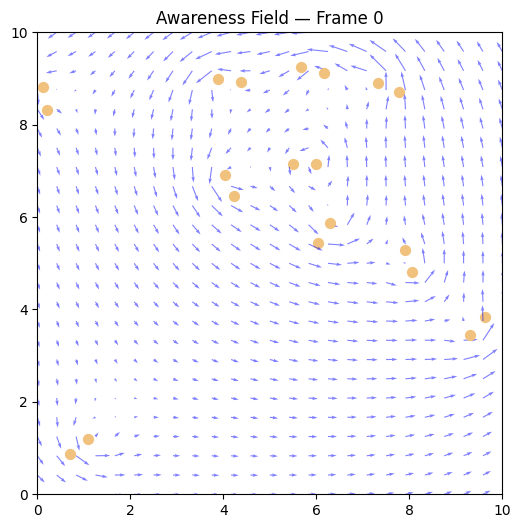

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Static thought nodes
np.random.seed(0)
thoughts = np.random.rand(10, 2) * 10

# Awareness field: rotates around each thought, nothing else
def combined_rotational_field(x, y):
    vx, vy = 0, 0
    for tx, ty in thoughts:
        dx = x - tx
        dy = y - ty
        r2 = dx**2 + dy**2 + 0.1  # avoid div by zero
        # perpendicular to radial vector => rotation around thought
        vx += -dy / r2
        vy += dx / r2
    return vx, vy

# Set up plot
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(thoughts[:,0], thoughts[:,1], c='#f1c27d', s=50, label='Observers')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Awareness Field Rotating Around Thought Nodes")

# Create field grid
X, Y = np.meshgrid(np.linspace(0,10,25), np.linspace(0,10,25))
U = np.zeros_like(X)
V = np.zeros_like(Y)
qv = ax.quiver(X, Y, U, V, color='blue', alpha=0.5)

# # Animation loop
# for frame in range(40):
#     scale = 1 + 0.5 * np.sin(frame / 20)  # optional: oscillating field strength
#     for i in range(X.shape[0]):
#         for j in range(X.shape[1]):
#             u, v = combined_rotational_field(X[i,j], Y[i,j])
#             U[i,j] = u * scale
#             V[i,j] = v * scale
#     qv.set_UVC(U, V)
#     ax.set_title(f"Awareness Field — Frame {frame}")
#     plt.pause(0.05)
# ...existing code...

# Initial scatter plot
scat = ax.scatter(thoughts[:,0], thoughts[:,1], c='#f1c27d', s=50, label='Observers')

# Animation loop
for frame in range(400):
    # Move thought nodes in small circles
    angle = 2 * np.pi * frame / 40
    moving_thoughts = thoughts + 0.5 * np.column_stack([
        np.cos(angle + np.arange(len(thoughts))),
        np.sin(angle + np.arange(len(thoughts)))
    ])

    def combined_rotational_field(x, y):
        vx, vy = 0, 0
        for tx, ty in moving_thoughts:
            dx = x - tx
            dy = y - ty
            r2 = dx**2 + dy**2 + 0.1
            vx += -dy / r2
            vy += dx / r2
        return vx, vy

    scale = 1 + 0.5 * np.sin(frame / 20)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            u, v = combined_rotational_field(X[i,j], Y[i,j])
            U[i,j] = u * scale
            V[i,j] = v * scale
    qv.set_UVC(U, V)
    scat.remove()  # Remove previous scatter plot
    scat = ax.scatter(moving_thoughts[:,0], moving_thoughts[:,1], c='#f1c27d', s=50, label='Observers')
    ax.set_title(f"Awareness Field — Frame {frame}")
    plt.pause(0.05)
# ...existing code...

In [3]:
ani.save("awareness_field.mp4", writer='ffmpeg', fps=30)


C:\Users\sidha\AppData\Local\Temp\ipykernel_130976\3601376191.py:48: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  observer_dot.set_data(observer[0], observer[1])
